In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
adresses = [
    'YouTube_QUIC_CSV/1_Wildlife/',
    'YouTube_QUIC_CSV/2_Dynasties/',
    'YouTube_QUIC_CSV/3_Big_Bang/',
    'YouTube_QUIC_CSV/4_UK_National_Parks/',
    'YouTube_QUIC_CSV/5_Mate_or_die_trying/',
    'YouTube_QUIC_CSV/6_Where_Are_the_Stars/',
    'YouTube_QUIC_CSV/7_Filming_Wildlife_Documentary/',
    'YouTube_QUIC_CSV/8_Fireflies/',
    'YouTube_QUIC_CSV/9_Seven_Worlds/',
    'YouTube_QUIC_CSV/10_Uncover_Antarctica/',
    'YouTube_QUIC_CSV/11_What_Sperm_Whales/',
    'YouTube_QUIC_CSV/12_Everest_Biology/',
    'YouTube_QUIC_CSV/13_Mapping_the_Highest_Peak/',
    'YouTube_QUIC_CSV/14_Meet_the_Worlds_Tiniest_Trees/',
    'YouTube_QUIC_CSV/15_What_To_Do/',
    'YouTube_QUIC_CSV/16_Everest_Weather/',
    'YouTube_QUIC_CSV/17_What_Mud_From_Glacial_Lakes/',
    'YouTube_QUIC_CSV/18_Everest_Glaciology/',
    'YouTube_QUIC_CSV/19_Plants_Dying/',
    'YouTube_QUIC_CSV/20_Macaroni_Penguins/',
    'YouTube_QUIC_CSV/21_Go_Inside_an_Antarctic_City/',
    'YouTube_QUIC_CSV/22_Snow_Leopards/',
    'YouTube_QUIC_CSV/23_Saving_the_Florida_Wildlife_Corridor/',
    'YouTube_QUIC_CSV/24_Wolf_Pack_Takes_on_a_Polar_Bear/',
    'YouTube_QUIC_CSV/25_Last_Wild_Places/'
]

In [3]:
def density_counter(quality, is_plotted):
    time_unit = 1

    d = {'Video_number': [], 'Density_burst': [], 'Density_throttling': []}
    for i in range(len(adresses)):
        data = pd.read_csv(adresses[i] + quality + '.csv', encoding='cp1251')
        max_time = data['Time'].iat[-1] - data['Time'].iat[0]
        time_units = math.ceil(max_time / time_unit)
        lengths = [0] * time_units
        for index, row in data.iterrows():
            lengths[math.floor(row['Time'] / time_unit)] += row['Length']

        # получили массив длин, надо вычислить расположение первоначального пика
        # и вычислить Density_burst и Density_throttling
        
        if is_plotted == True:
            
            times = [0] * (time_units + 1)

            for m in range(len(times)):
                times[m] = m * time_unit
            times = [0] * (time_units + 1)

            for m in range(len(times)):
                times[m] = m * time_unit

            plt.stairs(lengths, times, fill=True)
            plt.title(adresses[i] + '4K.csv')
            plt.xlabel('time')
            plt.show()

            
        difference_pos = 0
        
        # 40 -- 40 секунд, за которые точно успевает пройти burst
        burst_max_time = 40
        if time_units - 1 < 40:
            burst_max_time = time_units - 1
        
        # 1 способ -- если есть отрезок с нулевой передаваемой длиной
#         for j in range(burst_max_time // time_unit):
#             if (difference_pos == 0 and lengths[j + 1] == 0):
#                 difference_pos = j + 1

        # 2 способ -- если столбец отличается в 3 раза от следующего
#         if difference_pos == 0:
#             coeff = 3
#             for j in range(burst_max_time // time_unit):
#                 if lengths[j] != 0 and lengths[j + 1] != 0 and lengths[j] > lengths[j + 1] * coeff:
#                     difference_pos = j + 1
#                     coeff = lengths[j] / lengths[j + 1]
        
        # 3 способ -- поиск зоны с наибольшей разницей плотности
        if difference_pos == 0:
            difference = 0
            for j in range(1, time_units):
                first_sum = 0
                second_sum = 0
                for k in range(0, j):
                    first_sum += lengths[k]
                for l in range(j, time_units):
                    second_sum += lengths[l]
                if first_sum / j - second_sum / (time_units - j) > difference:
                    difference = first_sum / j - second_sum / (time_units - j)
                    difference_pos = j
        
        if is_plotted == True:
            print('difference_pos: ' + str(difference_pos))

        
        # Вычислили расположение первоначального пика, остались density_burst и density_throttling

        density_burst = 0
        density_throttling = 0
        for p in range(0, difference_pos):
            density_burst += lengths[p]
        for q in range(difference_pos, time_units):
            density_throttling += lengths[q]
        density_burst = density_burst / (difference_pos * time_unit)
        density_throttling = density_throttling / ((time_units - difference_pos) * time_unit)

        num_spaces = len(str(int(density_burst))) - len(str(int(density_throttling)))
        
        if is_plotted == True:
            print('density_burst:        ', density_burst)
            print('density_throttling:   ' + ' ' * num_spaces, density_throttling)

        d['Video_number'].append(i + 1)
        d['Density_burst'].append(density_burst)
        d['Density_throttling'].append(density_throttling)
        
    return d

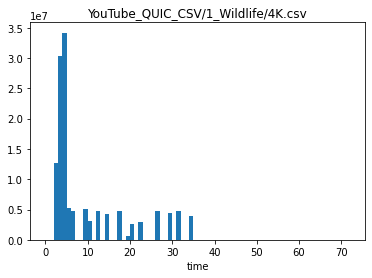

difference_pos: 5
density_burst:         15430822.2
density_throttling:      834446.9850746269


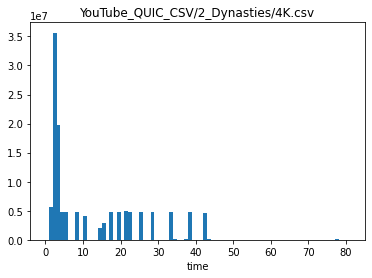

difference_pos: 4
density_burst:         15258322.5
density_throttling:      873414.4545454546


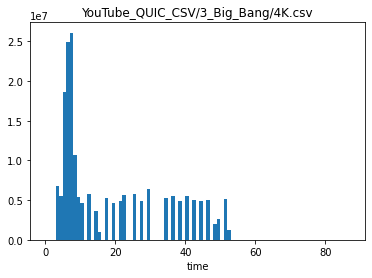

difference_pos: 9
density_burst:         10281443.333333334
density_throttling:     1348282.0512820513


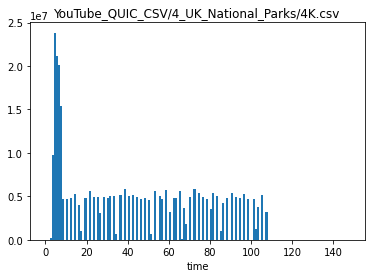

difference_pos: 8
density_burst:         11312924.875
density_throttling:     1768926.6642857143


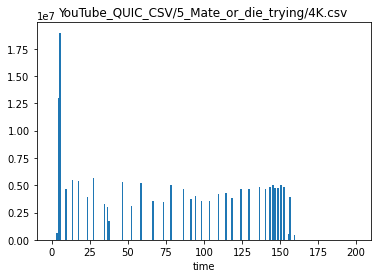

difference_pos: 6
density_burst:         5439688.5
density_throttling:     740712.9381443299


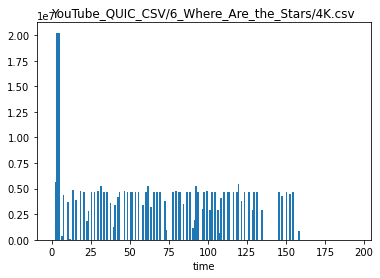

difference_pos: 5
density_burst:         9222627.0
density_throttling:    1570663.9210526317


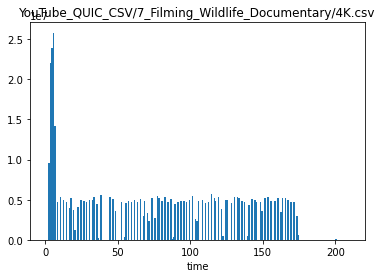

difference_pos: 7
density_burst:         13628963.42857143
density_throttling:     1909876.802955665


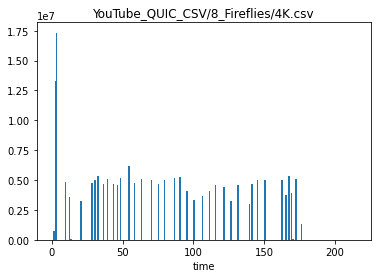

difference_pos: 4
density_burst:         7834751.0
density_throttling:     790624.5023696682


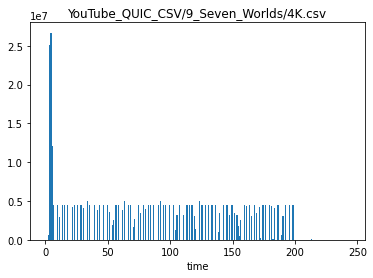

difference_pos: 6
density_burst:         10761957.666666666
density_throttling:     1412740.4663865545


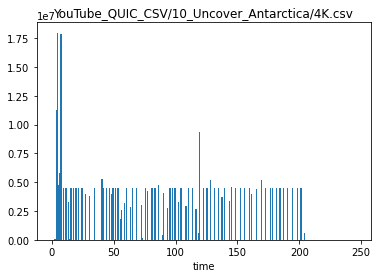

difference_pos: 8
density_burst:         7207303.25
density_throttling:    1283866.3109243698


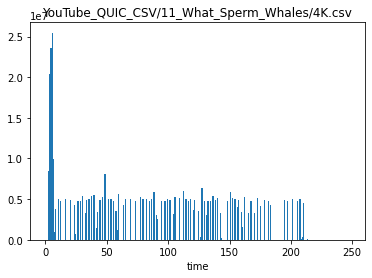

difference_pos: 6
density_burst:         12990394.666666666
density_throttling:     1635814.3016528925


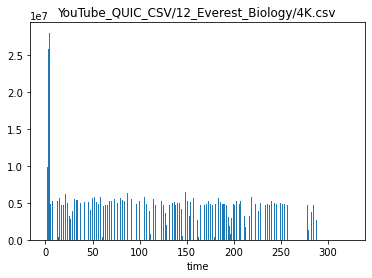

difference_pos: 5
density_burst:         12768480.8
density_throttling:     1604311.6635220125


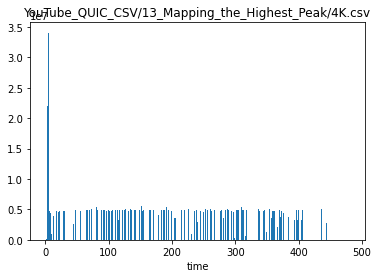

difference_pos: 6
density_burst:         13712325.166666666
density_throttling:     1612648.452631579


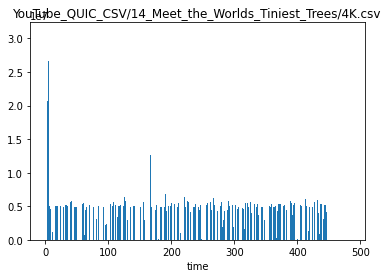

difference_pos: 6
density_burst:         13323772.833333334
density_throttling:     2121252.0293501047


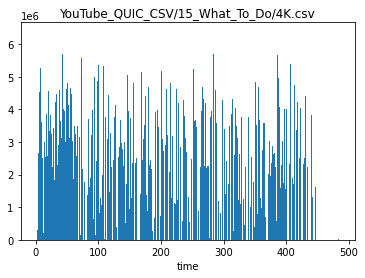

difference_pos: 448
density_burst:         2279799.879464286
density_throttling:        870.8421052631579


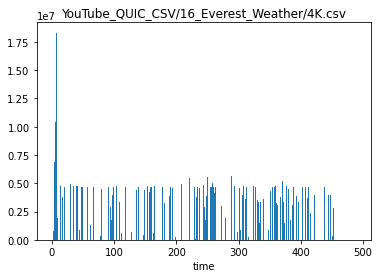

difference_pos: 9
density_burst:         7910631.111111111
density_throttling:    1342417.36875


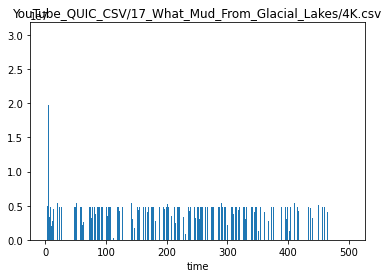

difference_pos: 6
density_burst:         9184916.0
density_throttling:    1791776.877016129


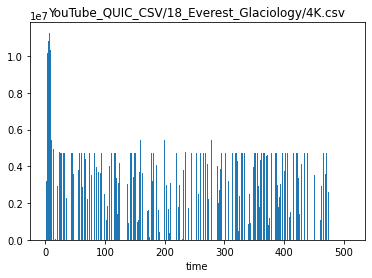

difference_pos: 9
density_burst:         7276386.777777778
density_throttling:    1511871.24750499


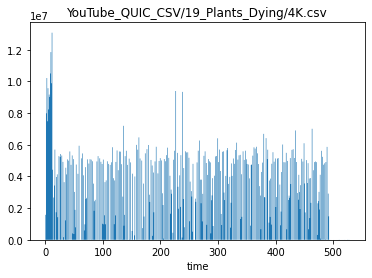

difference_pos: 12
density_burst:         9047016.833333334
density_throttling:    2301584.7214700193


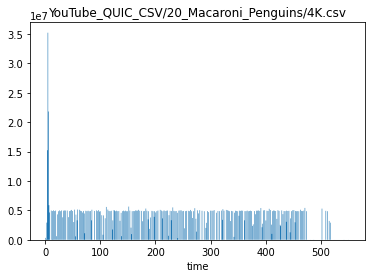

difference_pos: 6
density_burst:         12598497.5
density_throttling:     1961697.8647166362


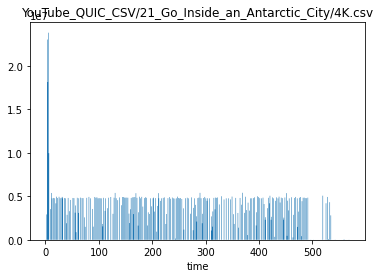

difference_pos: 6
density_burst:         11311168.5
density_throttling:     1683205.0159574468


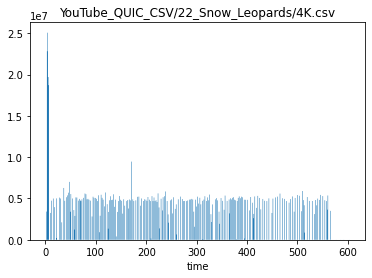

difference_pos: 7
density_burst:         12815375.142857144
density_throttling:     1646338.1306532663


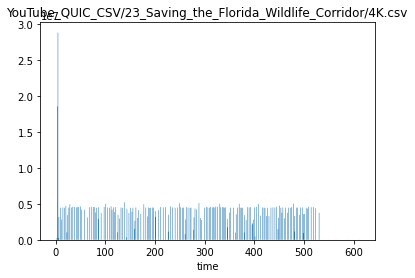

difference_pos: 5
density_burst:         9518399.0
density_throttling:    1137016.0888157894


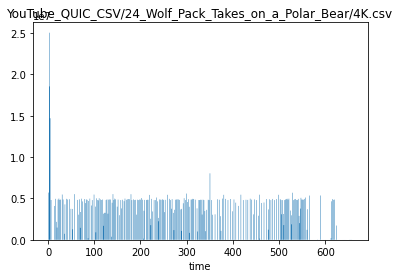

difference_pos: 5
density_burst:         12793860.8
density_throttling:     1508738.9281345566


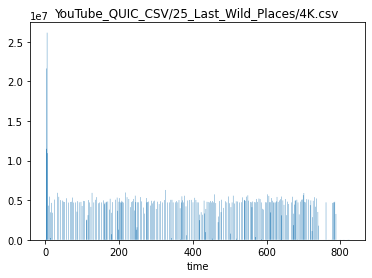

difference_pos: 5
density_burst:         11861099.0
density_throttling:     1319564.0706455542


In [4]:
d = density_counter('4K', True)

In [5]:
pd.DataFrame(data=d).head(5)

,Video_number,Density_burst,Density_throttling
0,1,1.543082e+07,8.344470e+05
1,2,1.525832e+07,8.734145e+05
2,3,1.028144e+07,1.348282e+06
3,4,1.131292e+07,1.768927e+06
4,5,5.439688e+06,7.407129e+05


In [6]:
df_4K = pd.DataFrame(data=density_counter('4K', False))
df_4K.head(5)

,Video_number,Density_burst,Density_throttling
0,1,1.543082e+07,8.344470e+05
1,2,1.525832e+07,8.734145e+05
2,3,1.028144e+07,1.348282e+06
3,4,1.131292e+07,1.768927e+06
4,5,5.439688e+06,7.407129e+05


In [7]:
df_1440 = pd.DataFrame(data=density_counter('1440', False))
df_1440.head(5)

,Video_number,Density_burst,Density_throttling
0,1,4.389236e+06,52963.046875
1,2,8.776270e+06,27020.076923
2,3,1.117876e+07,148126.392405
3,4,9.404043e+06,435493.321678
4,5,5.044634e+06,135629.867725


In [8]:
df_1080 = pd.DataFrame(data=density_counter('1080', False))
df_1080.head(5)

,Video_number,Density_burst,Density_throttling
0,1,4.629529e+06,1622.867647
1,2,3.824887e+06,10973.012821
2,3,5.579391e+06,1273.612500
3,4,6.771195e+06,18680.333333
4,5,2.827729e+06,54106.528497


In [9]:
df_720 = pd.DataFrame(data=density_counter('720', False))
df_720.head(5)

,Video_number,Density_burst,Density_throttling
0,1,2545400.80,1421.366197
1,2,2373999.25,23217.730769
2,3,4027081.00,3663.790123
3,4,4611469.00,1618.375887
4,5,2811433.75,20993.786458


In [10]:
df_480 = pd.DataFrame(data=density_counter('480', False))
df_480.head(5)

,Video_number,Density_burst,Density_throttling
0,1,1806642.00,1185.588235
1,2,1185017.40,2972.532468
2,3,1622196.60,883.963855
3,4,2477944.60,1511.739437
4,5,1988265.75,9730.867725


In [11]:
df_360 = pd.DataFrame(data=density_counter('360', False))
df_360.head(5)

,Video_number,Density_burst,Density_throttling
0,1,890759.00,1218.072464
1,2,954733.75,1759.948052
2,3,1032443.00,1506.790123
3,4,1468668.60,4332.551724
4,5,1238214.50,12341.020725


In [12]:
df_4K["Quality"] = "2160"
df_1440["Quality"] = "1440"
df_1080["Quality"] = "1080"
df_720["Quality"] = "720"
df_480["Quality"] = "480"
df_360["Quality"] = "360"

In [13]:
data = pd.concat([df_4K, df_1440, df_1080, df_720, df_480, df_360], ignore_index=True)
data

,Video_number,Density_burst,Density_throttling,Quality
0,1,1.543082e+07,8.344470e+05,2160
1,2,1.525832e+07,8.734145e+05,2160
2,3,1.028144e+07,1.348282e+06,2160
3,4,1.131292e+07,1.768927e+06,2160
4,5,5.439688e+06,7.407129e+05,2160
...,...,...,...,...
145,21,1.722118e+06,3.582496e+04,360
146,22,1.422481e+06,3.824372e+04,360
147,23,1.003604e+06,2.928689e+04,360
148,24,1.990373e+06,3.742236e+04,360


In [14]:
import os   
data.to_csv('data_QUIC.csv')  